In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
from tqdm import tqdm
from sklearn import preprocessing

from trackml.dataset import load_event, load_dataset
from trackml.score import score_event

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

class Clusterer(object):
    
    def __init__(self, eps):
        self.eps = eps
        
    
    def _preprocess(self, hits):
        
        x = hits.x.values
        y = hits.y.values
        z = hits.z.values

        r = np.sqrt(x**2 + y**2 + z**2)
        hits['x2'] = x/r
        hits['y2'] = y/r

        r = np.sqrt(x**2 + y**2)
        hits['z2'] = z/r

        ss = StandardScaler()
        X = ss.fit_transform(hits[['x2', 'y2', 'z2']].values)
        
        return X
    
    
    def predict(self, hits):
        
        X = self._preprocess(hits)
        
        cl = DBSCAN(eps=self.eps, min_samples=1, algorithm='kd_tree')
        labels = cl.fit_predict(X)
        
        return labels

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

class Clusterer2(object):
    
    def __init__(self, eps):
        self.eps = eps
        
    
    def _preprocess(self, hits):
        
        x = hits.x.values
        y = hits.y.values
        z = hits.z.values
        
        r = np.sqrt(x**2 + y**2 + z**2)
        
        hits['x2'] = x+(x/r)
        hits['y2'] = y+(y/r)

#         r = np.sqrt(x**2 + y**2)
        hits['z2'] = z+(z/r)

        ss = StandardScaler()
        X = ss.fit_transform(hits[['x2', 'y2', 'z2']].values)
        
        return X
    
    
    def predict(self, hits):
        
        X = self._preprocess(hits)
        
        cl = DBSCAN(eps=self.eps, min_samples=1, algorithm='kd_tree')
        labels = cl.fit_predict(X)
        
        return labels

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

class Clusterer3(object):
    
    def __init__(self, eps):
        self.eps = eps
        
    
    def _preprocess(self, hits):
        
        x = hits.x.values
        y = hits.y.values
        z = hits.z.values
        
        r = np.sqrt(x**2 + y**2 + z**2)
        
        hits['x2'] = (x/r)
        hits['y2'] = (y/r)

#         r = np.sqrt(x**2 + y**2)
        hits['z2'] = (z/r)

        ss = StandardScaler()
        X = ss.fit_transform(hits[['x2', 'y2', 'z2']].values)
        
        return X
    
    
    def predict(self, hits):
        
        X = self._preprocess(hits)
        
        cl = DBSCAN(eps=self.eps, min_samples=1, algorithm='auto')
        labels = cl.fit_predict(X)
        
        return labels

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

class Clusterer1(object):
    
    def __init__(self, eps):
        self.eps = eps
        self.clf = DBSCAN(eps=self.eps, min_samples=1, algorithm='kd_tree')
    
    def _preprocess(self, hits):
        
        x = hits.x.values
        y = hits.y.values
        z = hits.z.values

        r = np.sqrt(x**2 + y**2 + z**2)
        hits['x2'] = x/r
        hits['y2'] = y/r

        r = np.sqrt(x**2 + y**2)
        hits['z2'] = z/r

        ss = StandardScaler()
        X = ss.fit_transform(hits[['x2', 'y2', 'z2']].values)
        
        return X
    
    def fit(self, hits):
        X = self._preprocess(hits)
        self.clf.fit(hits)
        
    def predict_test(self, hits):
        X_test = self._preprocess(hits)
        labels = self.clf.predict(X_test)
        
        return labels
    
    def predict(self, hits):
        
        X = self._preprocess(hits)
        
        cl = DBSCAN(eps=self.eps, min_samples=1, algorithm='kd_tree')
        labels = cl.fit_predict(X)
        
        return labels

In [7]:
def create_one_event_submission(event_id, hits, labels):
    sub_data = np.column_stack(([event_id]*len(hits), hits.hit_id.values, labels))
    submission = pd.DataFrame(data=sub_data, columns=["event_id", "hit_id", "track_id"]).astype(int)
    return submission

In [14]:
# this scores 0.2078 on the public LB
path_to_test = "../data/test"
test_dataset_submissions = []

create_submission = True # True for submission 

if create_submission:
    for event_id, hits, cells in load_dataset(path_to_test, parts=['hits', 'cells']):

        # Track pattern recognition
        model = Clusterer(eps=0.008)
        labels = model.predict(hits)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits, labels)
        test_dataset_submissions.append(one_submission)
        
        print('Event ID: ', event_id)

    # Create submission file
    submussion = pd.concat(test_dataset_submissions, axis=0)
    IDENTIFIER = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    submussion.to_csv('../submissions/sub-DBSCAN-sample-{}.csv.gz'.format(IDENTIFIER), index=False, compression='gzip')

Event ID:  0
Event ID:  1
Event ID:  2
Event ID:  3
Event ID:  4
Event ID:  5
Event ID:  6
Event ID:  7
Event ID:  8
Event ID:  9
Event ID:  10
Event ID:  11
Event ID:  12
Event ID:  13
Event ID:  14
Event ID:  15
Event ID:  16
Event ID:  17
Event ID:  18
Event ID:  19
Event ID:  20
Event ID:  21
Event ID:  22
Event ID:  23
Event ID:  24
Event ID:  25
Event ID:  26
Event ID:  27
Event ID:  28
Event ID:  29
Event ID:  30
Event ID:  31
Event ID:  32
Event ID:  33
Event ID:  34
Event ID:  35
Event ID:  36
Event ID:  37
Event ID:  38
Event ID:  39
Event ID:  40
Event ID:  41
Event ID:  42
Event ID:  43
Event ID:  44
Event ID:  45
Event ID:  46
Event ID:  47
Event ID:  48
Event ID:  49
Event ID:  50
Event ID:  51
Event ID:  52
Event ID:  53
Event ID:  54
Event ID:  55
Event ID:  56
Event ID:  57
Event ID:  58
Event ID:  59
Event ID:  60
Event ID:  61
Event ID:  62
Event ID:  63
Event ID:  64
Event ID:  65
Event ID:  66
Event ID:  67
Event ID:  68
Event ID:  69
Event ID:  70
Event ID:  71
Ev

In [16]:
path_to_train = "../data/train_100_events"
train_sample_scores = []

for event_id, hits, cells, particles, truth in load_dataset(path_to_train):

    # Track pattern recognition
    model = Clusterer(eps=0.008)
    labels = model.predict(hits)

    # Prepare submission for an event
    one_submission = create_one_event_submission(event_id, hits, labels)
    score = score_event(truth, one_submission)

    train_sample_scores.append(score)

#     print("Score for event %d: %.3f" % (event_id, score))

#     print('Event ID: {}, Score: {}'.format(event_id, score))
print('Mean score: %.3f' % (np.mean(train_sample_scores)))

Event ID: 1000, Score: 0.1988556913647304
Event ID: 1001, Score: 0.2041585884317101
Event ID: 1002, Score: 0.18318435313069215
Event ID: 1003, Score: 0.21273428168683847
Event ID: 1004, Score: 0.19506492906816675
Event ID: 1005, Score: 0.19742897826381522
Event ID: 1006, Score: 0.19686337989951777
Event ID: 1007, Score: 0.2044755523190459
Event ID: 1008, Score: 0.20589788785782545
Event ID: 1009, Score: 0.20768824783976925
Event ID: 1010, Score: 0.20025412138170395
Event ID: 1011, Score: 0.19694834768548108
Event ID: 1012, Score: 0.2111250609405797
Event ID: 1013, Score: 0.21081737736211192
Event ID: 1014, Score: 0.18935862442764448
Event ID: 1015, Score: 0.19712979797213848
Event ID: 1016, Score: 0.20185737963029127
Event ID: 1017, Score: 0.18970268605903584
Event ID: 1018, Score: 0.21665023512426124
Event ID: 1019, Score: 0.18462860835130326
Event ID: 1020, Score: 0.21833513864549936
Event ID: 1021, Score: 0.1999660563467387
Event ID: 1022, Score: 0.20446955745160267
Event ID: 1023, 

NameError: name 'dataset_scores' is not defined

In [17]:
print('Mean score: %.3f' % (np.mean(train_sample_scores)))

Mean score: 0.204


In [26]:
path_to_train = "../data/train_100_events"


for eps in [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train):

        # Track pattern recognition
        model = Clusterer(eps=eps)
        labels = model.predict(hits)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits, labels)
        score = score_event(truth, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.3f}, Mean score: {1:.4f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.001, Mean score: 0.0363
eps: 0.002, Mean score: 0.1014
eps: 0.003, Mean score: 0.1469
eps: 0.004, Mean score: 0.1753
eps: 0.005, Mean score: 0.1924
eps: 0.006, Mean score: 0.2015
eps: 0.007, Mean score: 0.2050
eps: 0.008, Mean score: 0.2041
eps: 0.009, Mean score: 0.1993
eps: 0.100, Mean score: 0.0001


In [30]:
eps = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.1]
mean = [0.0363, 0.1014, 0.1469, 0.1753,0.1924, 0.2015, 0.2050, 0.2041, 0.1993, 0.0001]

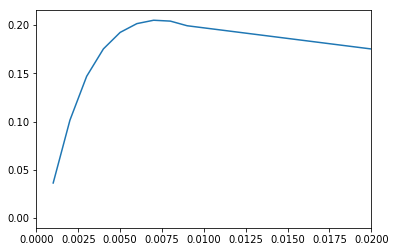

In [38]:
plt.plot(eps, mean)
plt.xlim(0.0, 0.02)
plt.show()

In [41]:
# this scores 0.2079 on the public LB
path_to_test = "../data/test"
test_dataset_submissions = []

create_submission = True # True for submission 

if create_submission:
    for event_id, hits, cells in load_dataset(path_to_test, parts=['hits', 'cells']):

        # Track pattern recognition
        model = Clusterer(eps=0.007)
        labels = model.predict(hits)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits, labels)
        test_dataset_submissions.append(one_submission)
        
        print('Event ID: ', event_id)

    # Create submission file
    submussion = pd.concat(test_dataset_submissions, axis=0)
    IDENTIFIER = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    submussion.to_csv('../submissions/sub-DBSCAN-sample-{}.csv.gz'.format(IDENTIFIER), index=False, compression='gzip')

Event ID:  0
Event ID:  1
Event ID:  2
Event ID:  3
Event ID:  4
Event ID:  5
Event ID:  6
Event ID:  7
Event ID:  8
Event ID:  9
Event ID:  10
Event ID:  11
Event ID:  12
Event ID:  13
Event ID:  14
Event ID:  15
Event ID:  16
Event ID:  17
Event ID:  18
Event ID:  19
Event ID:  20
Event ID:  21
Event ID:  22
Event ID:  23
Event ID:  24
Event ID:  25
Event ID:  26
Event ID:  27
Event ID:  28
Event ID:  29
Event ID:  30
Event ID:  31
Event ID:  32
Event ID:  33
Event ID:  34
Event ID:  35
Event ID:  36
Event ID:  37
Event ID:  38
Event ID:  39
Event ID:  40
Event ID:  41
Event ID:  42
Event ID:  43
Event ID:  44
Event ID:  45
Event ID:  46
Event ID:  47
Event ID:  48
Event ID:  49
Event ID:  50
Event ID:  51
Event ID:  52
Event ID:  53
Event ID:  54
Event ID:  55
Event ID:  56
Event ID:  57
Event ID:  58
Event ID:  59
Event ID:  60
Event ID:  61
Event ID:  62
Event ID:  63
Event ID:  64
Event ID:  65
Event ID:  66
Event ID:  67
Event ID:  68
Event ID:  69
Event ID:  70
Event ID:  71
Ev

In [43]:
path_to_train = "../data/train_100_events"


for eps in [0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train):

        # Track pattern recognition
        model = Clusterer(eps=eps)
        labels = model.predict(hits)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits, labels)
        score = score_event(truth, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.4f}, Mean score: {1:.6f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.0061, Mean score: 0.2020
eps: 0.0062, Mean score: 0.2026
eps: 0.0063, Mean score: 0.2031
eps: 0.0064, Mean score: 0.2035
eps: 0.0065, Mean score: 0.2039
eps: 0.0066, Mean score: 0.2041
eps: 0.0067, Mean score: 0.2045
eps: 0.0068, Mean score: 0.2048
eps: 0.0069, Mean score: 0.2049
eps: 0.0070, Mean score: 0.2050
eps: 0.0071, Mean score: 0.2051
eps: 0.0072, Mean score: 0.2052
eps: 0.0073, Mean score: 0.2052
eps: 0.0074, Mean score: 0.2052
eps: 0.0075, Mean score: 0.2050


In [44]:
path_to_train = "../data/train_100_events"


for eps in [0.0072, 0.0073, 0.0074]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train):

        # Track pattern recognition
        model = Clusterer(eps=eps)
        labels = model.predict(hits)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits, labels)
        score = score_event(truth, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.4f}, Mean score: {1:.8f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.0072, Mean score: 0.20521408
eps: 0.0073, Mean score: 0.20519609
eps: 0.0074, Mean score: 0.20521875


In [45]:
path_to_train = "../data/train_100_events"
event_prefix = "event000001000"
hits, cells, particles, truth = load_event(os.path.join(path_to_train, event_prefix))

In [50]:
print(hits.head())
print(hits.shape)
print(cells.head())
print(cells.shape)
print(particles.head())
print(particles.shape)
print(truth.head())
print(truth.shape)

   hit_id          x         y       z  volume_id  layer_id  module_id
0       1 -64.409897 -7.163700 -1502.5          7         2          1
1       2 -55.336102  0.635342 -1502.5          7         2          1
2       3 -83.830498 -1.143010 -1502.5          7         2          1
3       4 -96.109100 -8.241030 -1502.5          7         2          1
4       5 -62.673599 -9.371200 -1502.5          7         2          1
(120939, 7)
   hit_id  ch0  ch1     value
0       1  209  617  0.013832
1       1  210  617  0.079887
2       1  209  618  0.211723
3       2   68  446  0.334087
4       3   58  954  0.034005
(664996, 4)
        particle_id        vx        vy        vz         px         py  \
0  4503668346847232 -0.009288  0.009861 -0.077879  -0.055269   0.323272   
1  4503737066323968 -0.009288  0.009861 -0.077879  -0.948125   0.470892   
2  4503805785800704 -0.009288  0.009861 -0.077879  -0.886484   0.105749   
3  4503874505277440 -0.009288  0.009861 -0.077879   0.257539  -0.67671

In [52]:
truth1 = pd.merge(truth, particles, how='left', on='particle_id')

In [53]:
truth1.shape

(120939, 17)

In [54]:
truth1.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,vx,vy,vz,px,py,pz,q,nhits
0,1,0,-64.411598,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010,-0.015802,0.006381,1.16279,-0.569670,-0.011187,-15.49600,1.0,10.0
2,3,0,-83.828003,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,297237712845406208,-96.122902,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008,-0.000486,-0.015051,5.75865,-0.240629,0.012071,-3.70766,-1.0,11.0
4,5,418835796137607168,-62.659401,-9.375040,-1502.5,-0.281806,-0.023487,-6.57318,0.000009,0.018366,-0.016865,4.19268,-0.268943,-0.058487,-6.58619,1.0,10.0


In [56]:
truth2 = truth1.dropna()

In [57]:
truth2.shape

(103305, 17)

In [60]:
hits1 = pd.merge(hits, truth1, how='left', on='hit_id')

In [61]:
hits1.shape

(120939, 23)

In [62]:
hits1.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,tpz,weight,vx,vy,vz,px,py,pz,q,nhits
0,1,-64.409897,-7.163700,-1502.5,7,2,1,0,-64.411598,-7.164120,...,-956385.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,-55.336102,0.635342,-1502.5,7,2,1,22525763437723648,-55.338501,0.630805,...,-15.49220,0.000010,-0.015802,0.006381,1.16279,-0.569670,-0.011187,-15.49600,1.0,10.0
2,3,-83.830498,-1.143010,-1502.5,7,2,1,0,-83.828003,-1.145580,...,-760877.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,-96.109100,-8.241030,-1502.5,7,2,1,297237712845406208,-96.122902,-8.230360,...,-3.70232,0.000008,-0.000486,-0.015051,5.75865,-0.240629,0.012071,-3.70766,-1.0,11.0
4,5,-62.673599,-9.371200,-1502.5,7,2,1,418835796137607168,-62.659401,-9.375040,...,-6.57318,0.000009,0.018366,-0.016865,4.19268,-0.268943,-0.058487,-6.58619,1.0,10.0


In [68]:
path_to_train = "../data/train_100_events"


for eps in [0.0072, 0.0073, 0.0074]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train):
        
        truth1 = pd.merge(truth, particles, how='left', on='particle_id')
        hits1 = pd.merge(hits, truth1, how='left', on='hit_id')
        
        hits2 = hits1.dropna()
        truth2 = truth1.dropna()
        
        hits3 = hits2[hits2.nhits > 3]
        truth3 = truth2[truth2.nhits > 3]
        
        # Track pattern recognition
        model = Clusterer(eps=eps)
        labels = model.predict(hits3)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits3, labels)
        score = score_event(truth3, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.4f}, Mean score: {1:.8f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.0072, Mean score: 0.20551536
eps: 0.0073, Mean score: 0.20562315
eps: 0.0074, Mean score: 0.20572021


In [70]:
# path_to_train = "../data/train_100_events"


# for eps in [0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008, 0.009]:
#     train_sample_scores = []
#     for event_id, hits, cells, particles, truth in load_dataset(path_to_train):
        
#         truth1 = pd.merge(truth, particles, how='left', on='particle_id')
#         hits1 = pd.merge(hits, truth1, how='left', on='hit_id')
        
#         hits2 = hits1.dropna()
#         truth2 = truth1.dropna()
        
#         hits3 = hits2[hits2.nhits > 3]
#         truth3 = truth2[truth2.nhits > 3]
        
#         # Track pattern recognition
#         model = Clusterer(eps=eps)
#         labels = model.predict(hits3)

#         # Prepare submission for an event
#         one_submission = create_one_event_submission(event_id, hits3, labels)
#         score = score_event(truth3, one_submission)

#         train_sample_scores.append(score)

#     #     print("Score for event %d: %.3f" % (event_id, score))

#     #     print('Event ID: {}, Score: {}'.format(event_id, score))
#     print('eps: {0:.4f}, Mean score: {1:.8f}'.format(eps, (np.mean(train_sample_scores))))

# eps: 0.0075, Mean score: 0.20580227
# eps: 0.0076, Mean score: 0.20572321
# eps: 0.0077, Mean score: 0.20564800
# eps: 0.0078, Mean score: 0.20545296

In [ ]:
path_to_train = "../data/train"

eps = 0.0075
model = Clusterer1(eps=eps)
train_hits = pd.DataFrame()
train_sample_scores = []
for event_id, hits, cells, particles, truth in tqdm(load_dataset(path_to_train)):

    truth1 = pd.merge(truth, particles, how='left', on='particle_id')
    hits1 = pd.merge(hits, truth1, how='left', on='hit_id')

    hits2 = hits1.dropna()
    truth2 = truth1.dropna()

    hits3 = hits2[hits2.nhits > 3]
    truth3 = truth2[truth2.nhits > 3]

#     train_hits = train_hits.append(hits3)
    model.fit(hits3)
    del hits1, truth1
    del hits2, truth2
    del hits3, truth3

550it [25:55,  2.83s/it]

In [6]:
len(train_hits)

284374539

In [8]:
import pickle
 
with open('../cache/train_hits_3161.pkl', 'wb') as f:
    pickle.dump(train_hits, f)

OverflowError: cannot serialize a bytes object larger than 4 GiB

In [ ]:
train_hits.head()

In [ ]:
model.fit(train_hits)

In [ ]:
# this scores 0.2079 on the public LB
path_to_test = "../data/test"
test_dataset_submissions = []

create_submission = True # True for submission 

if create_submission:
    for event_id, hits, cells, particles in load_dataset(path_to_test, parts=['hits', 'cells', 'particles']):

        # Track pattern recognition
#         model = Clusterer(eps=0.007)
        labels = model.predict_test(hits)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits, labels)
        test_dataset_submissions.append(one_submission)
        
        print('Event ID: ', event_id)

    # Create submission file
    submussion = pd.concat(test_dataset_submissions, axis=0)
    IDENTIFIER = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    submussion.to_csv('../submissions/sub-DBSCAN-sample-{}.csv.gz'.format(IDENTIFIER), index=False, compression='gzip')

In [6]:
dataset_submissions = []
dataset_scores = []
path_to_train = "../data/train"
for event_id, hits, cells, particles, truth in load_dataset(path_to_train, skip=0, nevents=5):
        
    # Track pattern recognition
    model = Clusterer2(eps=0.075)
    labels = model.predict(hits)
        
    # Prepare submission for an event
    one_submission = create_one_event_submission(event_id, hits, labels)
    dataset_submissions.append(one_submission)
    
    # Score for the event
    score = score_event(truth, one_submission)
    dataset_scores.append(score)
    
    print("Score for event %d: %.6f" % (event_id, score))
    
print('Mean score: %.6f' % (np.mean(dataset_scores)))

Score for event 1000: 0.000095
Score for event 1001: 0.000496
Score for event 1002: 0.000142
Score for event 1003: 0.000383
Score for event 1004: 0.000193
Mean score: 0.000262


In [7]:
path_to_train = "../data/train_100_events"


for eps in [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train, nevents=5):
        
        truth1 = pd.merge(truth, particles, how='left', on='particle_id')
        hits1 = pd.merge(hits, truth1, how='left', on='hit_id')
        
        hits2 = hits1.dropna()
        truth2 = truth1.dropna()
        
        hits3 = hits2[hits2.nhits > 3]
        truth3 = truth2[truth2.nhits > 3]
        
        # Track pattern recognition
        model = Clusterer2(eps=eps)
        labels = model.predict(hits3)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits3, labels)
        score = score_event(truth3, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.6f}, Mean score: {1:.8f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.001000, Mean score: 0.00000000
eps: 0.002000, Mean score: 0.00000000
eps: 0.003000, Mean score: 0.00000000
eps: 0.004000, Mean score: 0.00025171
eps: 0.005000, Mean score: 0.00053165
eps: 0.006000, Mean score: 0.00051397
eps: 0.007000, Mean score: 0.00049043
eps: 0.008000, Mean score: 0.00046006
eps: 0.009000, Mean score: 0.00040250


In [8]:
path_to_train = "../data/train_100_events"


for eps in [0.01, 0.1, 1.0]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train, nevents=5):
        
        truth1 = pd.merge(truth, particles, how='left', on='particle_id')
        hits1 = pd.merge(hits, truth1, how='left', on='hit_id')
        
        hits2 = hits1.dropna()
        truth2 = truth1.dropna()
        
        hits3 = hits2[hits2.nhits > 3]
        truth3 = truth2[truth2.nhits > 3]
        
        # Track pattern recognition
        model = Clusterer2(eps=eps)
        labels = model.predict(hits3)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits3, labels)
        score = score_event(truth3, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.6f}, Mean score: {1:.8f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.010000, Mean score: 0.00036549
eps: 0.100000, Mean score: 0.00031835
eps: 1.000000, Mean score: 0.00000000


In [10]:
path_to_train = "../data/train_100_events"


for eps in [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train, nevents=5):
        
        truth1 = pd.merge(truth, particles, how='left', on='particle_id')
        hits1 = pd.merge(hits, truth1, how='left', on='hit_id')
        
        hits2 = hits1.dropna()
        truth2 = truth1.dropna()
        
        hits3 = hits2[hits2.nhits > 3]
        truth3 = truth2[truth2.nhits > 3]
        
        # Track pattern recognition
        model = Clusterer3(eps=eps)
        labels = model.predict(hits3)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits3, labels)
        score = score_event(truth3, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.6f}, Mean score: {1:.8f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.001000, Mean score: 0.11695307
eps: 0.002000, Mean score: 0.14883210
eps: 0.003000, Mean score: 0.14835454
eps: 0.004000, Mean score: 0.13623065
eps: 0.005000, Mean score: 0.11959371
eps: 0.006000, Mean score: 0.10101758
eps: 0.007000, Mean score: 0.08231689
eps: 0.008000, Mean score: 0.06673448
eps: 0.009000, Mean score: 0.05183591


In [14]:
path_to_train = "../data/train_100_events"


for eps in [0.0031, 0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039]:
    train_sample_scores = []
    for event_id, hits, cells, particles, truth in load_dataset(path_to_train, nevents=5):
        
        truth1 = pd.merge(truth, particles, how='left', on='particle_id')
        hits1 = pd.merge(hits, truth1, how='left', on='hit_id')
        
        hits2 = hits1.dropna()
        truth2 = truth1.dropna()
        
        hits3 = hits2[hits2.nhits > 3]
        truth3 = truth2[truth2.nhits > 3]
        
        # Track pattern recognition
        model = Clusterer3(eps=eps)
        labels = model.predict(hits3)

        # Prepare submission for an event
        one_submission = create_one_event_submission(event_id, hits3, labels)
        score = score_event(truth3, one_submission)

        train_sample_scores.append(score)

    #     print("Score for event %d: %.3f" % (event_id, score))

    #     print('Event ID: {}, Score: {}'.format(event_id, score))
    print('eps: {0:.6f}, Mean score: {1:.8f}'.format(eps, (np.mean(train_sample_scores))))

eps: 0.003100, Mean score: 0.14754640
eps: 0.003200, Mean score: 0.14627944
eps: 0.003300, Mean score: 0.14557765
eps: 0.003400, Mean score: 0.14465905
eps: 0.003500, Mean score: 0.14367359
eps: 0.003600, Mean score: 0.14261856
eps: 0.003700, Mean score: 0.14097457
eps: 0.003800, Mean score: 0.13942491
eps: 0.003900, Mean score: 0.13794391


In [71]:
#  most imp phi, then r
scl = preprocessing.StandardScaler()

hits = pd.read_csv('../cache/hits_1000_4_15_4_50.csv')
# rz_scales=[0.65, 0.965, 1.528]
rz_scales=[1., 1., 1.]
hits['x2'] = hits['x2'] * rz_scales[0]
hits['y2'] = hits['y2'] * rz_scales[1]
hits['z2'] = hits['z2'] * rz_scales[2]

x = hits.x.values
y = hits.y.values
z = hits.z.values

x2 = hits.x2.values
y2 = hits.y2.values
z2 = hits.z2.values
hits['rho'] = np.sqrt(x**2 + y**2 + z**2)
hits['r'] = np.sqrt(x2**2 + y2**2)
hits['phi'] = np.degrees(np.arctan2(hits['y2'], hits['x2']))
hits['phi_1'] = np.round(np.degrees(np.arctan2(hits['y2'], hits['x2'])), 5)
hits['theta'] = np.degrees(np.arctan2(hits['r'], hits['z2']))
phi = hits['phi'].values
theta = hits['theta'].values
rho = hits['rho'].values
r = hits['r'].values
hits['tan_dip'] = phi/theta
hits['tan_dip1'] = phi/z2
hits['z2_1'] = 1/z2
hits['z2_2'] = phi/z2 + 1/z2
# hits['dip'] = np.degrees(np.arctan2(hits['phi'], hits['z2']))
hits['dip_angle'] = np.arctan2(z2, (np.sqrt(x2**2 +y2**2)) * np.arccos(x2/np.sqrt(x2**2 + y2**2)))
scores = []
for m in ['braycurtis']: #Tuning/Grid Search
    print(m)
    try:
        dbscan = DBSCAN(eps=0.011, min_samples=1,metric='euclidean',n_jobs=8)
        
#             cl = Clusterer2()
        hits['track_id'] = dbscan.fit_predict(scl.fit_transform(hits[['z2', 'phi', 'r', 'tan_dip1', 'z2_1', 'z2_2']].values))
#             hits['track_id'] = cl.predict(hits)
        score = score_event(hits, hits[['event_id','hit_id','track_id']])
        print(m, len(hits['particle_id'].unique()), len(hits['track_id'].unique()), score)
        scores.append([score, m])
    except e:
        print("ERROR:", e)
#         break #Remove to test all
#     break #Remove to test more samples
print(sorted(scores, reverse=True))


braycurtis
braycurtis 10565 35296 0.23369642250193956
[[0.23369642250193956, 'braycurtis']]


In [80]:
#  most imp phi, then r
scl = preprocessing.StandardScaler()

hits = pd.read_csv('../cache/hits_1000_4_15_4_50.csv')
# rz_scales=[0.65, 0.965, 1.528]
rz_scales=[1., 1., 1.]
hits['x2'] = hits['x2'] * rz_scales[0]
hits['y2'] = hits['y2'] * rz_scales[1]
hits['z2'] = hits['z2'] * rz_scales[2]

x = hits.x.values
y = hits.y.values
z = hits.z.values

x2 = hits.x2.values
y2 = hits.y2.values
z2 = hits.z2.values
hits['rho'] = np.sqrt(x**2 + y**2 + z**2)
hits['r'] = np.sqrt(x2**2 + y2**2)
hits['phi'] = np.arctan2(hits['y2'], hits['x2'])
hits['phi_1'] = np.round(np.degrees(np.arctan2(hits['y2'], hits['x2'])), 5)
hits['theta'] = np.arctan2(hits['r'], hits['z2'])
phi = hits['phi'].values
theta = hits['theta'].values
rho = hits['rho'].values
r = hits['r'].values
hits['tan_dip'] = phi/theta
hits['tan_dip1'] = phi/z2
hits['z2_1'] = 1/z2
hits['z2_2'] = phi/z2 + 1/z2
# hits['dip'] = np.degrees(np.arctan2(hits['phi'], hits['z2']))
hits['dip_angle'] = np.arctan2(z2, (np.sqrt(x2**2 +y2**2)) * np.arccos(x2/np.sqrt(x2**2 + y2**2)))
scores = []
for m in ['braycurtis']: #Tuning/Grid Search
    print(m)
    try:
        dbscan = DBSCAN(eps=0.011, min_samples=1,metric='euclidean',n_jobs=8)
        
#             cl = Clusterer2()
        hits['track_id'] = dbscan.fit_predict(scl.fit_transform(hits[['z2', 'phi', 'r', 'tan_dip1', 'z2_1', 'z2_2']].values))
#             hits['track_id'] = cl.predict(hits)
        score = score_event(hits, hits[['event_id','hit_id','track_id']])
        print(m, len(hits['particle_id'].unique()), len(hits['track_id'].unique()), score)
        scores.append([score, m])
    except e:
        print("ERROR:", e)
#         break #Remove to test all
#     break #Remove to test more samples
print(sorted(scores, reverse=True))


braycurtis
braycurtis 10565 35467 0.23360570376754058
[[0.23360570376754058, 'braycurtis']]


In [ ]:
dfh['r'] = np.sqrt(dfh.x**2+dfh.y**2+dfh.z**2) (rho)
        dfh['rt'] = np.sqrt(dfh.x**2+dfh.y**2) (r)
        dfh['a0'] = np.arctan2(dfh.y,dfh.x) (phi)
        dfh['r2'] = np.sqrt(dfh.x**2+dfh.y**2) (r)
        dfh['z1'] = dfh['z']/dfh['rt'] (z2)      

dfh['a1'] = dfh['a0']+dz*dfh['z']*np.sign(dfh['z'].values) (phi increments)
            dfh['x1'] = dfh['a1']/dfh['z1'] ((phi/z2, same as tan_dip1))
            dfh['x2'] = 1/dfh['z1'] (1/z2)
            dfh['x3'] = dfh['x1']+dfh['x2'] (phi/z2 + 1/z2)

In [98]:
#  most imp phi, then r
scl = preprocessing.StandardScaler()

hits = pd.read_csv('../cache/hits_1000_4_15_4_50.csv')
# rz_scales=[0.65, 0.965, 1.528]
rz_scales=[1., 1., 1.]
hits['x2'] = hits['x2'] * rz_scales[0]
hits['y2'] = hits['y2'] * rz_scales[1]
hits['z2'] = hits['z2'] * rz_scales[2]

x = hits.x.values
y = hits.y.values
z = hits.z.values

x2 = hits.x2.values
y2 = hits.y2.values
z2 = hits.z2.values
hits['rho'] = np.sqrt(x**2 + y**2 + z**2)
hits['r'] = np.sqrt(x**2 + y**2)
hits['r2'] = np.sqrt(x2**2 + y2**2)
hits['phi'] = np.arctan2(hits['y'], hits['x'])
hits['phi2'] = np.arctan2(hits['y2'], hits['x2'])
hits['phi_1'] = np.round(np.degrees(np.arctan2(hits['y'], hits['x'])), 5)
hits['theta'] = np.arctan2(hits['r'], hits['z'])
hits['theta'] = np.arctan2(hits['r2'], hits['z2'])
phi = hits['phi'].values
theta = hits['theta'].values
rho = hits['rho'].values
r = hits['r'].values
hits['tan_dip'] = phi/theta
hits['tan_dip1'] = phi/z2
hits['z2_1'] = 1/z2
hits['z2_2'] = phi/z2 + 1/z2
# hits['dip'] = np.degrees(np.arctan2(hits['phi'], hits['z2']))
# hits['dip_angle'] = np.arctan2(z2, (np.sqrt(x2**2 +y2**2)) * np.arccos(x2/np.sqrt(x2**2 + y2**2)))
scores = []
for m in ['braycurtis']: #Tuning/Grid Search
    print(m)
    try:
        dbscan = DBSCAN(eps=0.011, min_samples=1,metric='euclidean',n_jobs=8)
        
#             cl = Clusterer2()
        hits['track_id'] = dbscan.fit_predict(scl.fit_transform(hits[['z2', 'phi2', 'r2','tan_dip1', 'z2_1', 'z2_2']].values))
#             hits['track_id'] = cl.predict(hits)
        score = score_event(hits, hits[['event_id','hit_id','track_id']])
        print(m, len(hits['particle_id'].unique()), len(hits['track_id'].unique()), score)
        scores.append([score, m])
    except e:
        print("ERROR:", e)
#         break #Remove to test all
#     break #Remove to test more samples
print(sorted(scores, reverse=True))


braycurtis
braycurtis 10565 35467 0.23360570376754058
[[0.23360570376754058, 'braycurtis']]


In [111]:
#  most imp phi, then r
scl = preprocessing.StandardScaler()

hits = pd.read_csv('../cache/hits_1000_4_15_4_50.csv')
# rz_scales=[0.65, 0.965, 1.528]
rz_scales=[1., 1., 1.]
hits['x2'] = hits['x2'] * rz_scales[0]
hits['y2'] = hits['y2'] * rz_scales[1]
hits['z2'] = hits['z2'] * rz_scales[2]

x = hits.x.values
y = hits.y.values
z = hits.z.values

x2 = hits.x2.values
y2 = hits.y2.values
z2 = hits.z2.values
hits['rho'] = np.sqrt(x**2 + y**2 + z**2)
hits['r'] = np.sqrt(x**2 + y**2)
hits['r2'] = np.sqrt(x2**2 + y2**2)
hits['phi'] = np.arctan2(hits['y'], hits['x'])
hits['phi2'] = np.arctan2(hits['y2'], hits['x2'])
hits['phi_1'] = np.round(np.degrees(np.arctan2(hits['y'], hits['x'])), 5)
hits['theta'] = np.arctan2(hits['r'], hits['z'])
hits['theta'] = np.arctan2(hits['r2'], hits['z2'])
phi = hits['phi'].values
theta = hits['theta'].values
rho = hits['rho'].values
r = hits['r'].values
hits['tan_dip'] = phi/theta
hits['tan_dip1'] = phi/z2
hits['z2_1'] = 1/z2
hits['z2_2'] = phi/z2 + 1/z2
# hits['dip'] = np.degrees(np.arctan2(hits['phi'], hits['z2']))
hits['dip_angle'] = np.arctan2(z2, (np.sqrt(x2**2 +y2**2)) * np.arccos(x2/np.sqrt(x2**2 + y2**2)))
scores = []
for m in ['braycurtis']: #Tuning/Grid Search
    print(m)
    try:
        dbscan = DBSCAN(eps=0.011, min_samples=1,metric='euclidean',n_jobs=8)
        
#             cl = Clusterer2()
        hits['track_id'] = dbscan.fit_predict(scl.fit_transform(hits[['z2', 'phi2', 'r2', 'tan_dip1', 'z2_1', 'z2_2']].values))
#             hits['track_id'] = cl.predict(hits)
        score = score_event(hits, hits[['event_id','hit_id','track_id']])
        print(m, len(hits['particle_id'].unique()), len(hits['track_id'].unique()), score)
        scores.append([score, m])
    except e:
        print("ERROR:", e)
#         break #Remove to test all
#     break #Remove to test more samples
print(sorted(scores, reverse=True))


braycurtis
braycurtis 10565 35467 0.23360570376754058
[[0.23360570376754058, 'braycurtis']]
